# Problem Overview
 

## Description 
The overarching purpose of our research project is it study the relationship between different risk factors that can cause cardiovascular disease. We believe it is an important undertaking because we are always looking to understand the relationships between lifestyle and health. With science-backed findings, we want to help individuals in making better decisions, communities in promoting healthier public health practices, and governments in finding the best balance in resource-allocation between public healthcare and research and development.

## Background
For decades now, cardiovascular disease has been the leading killer of Americans. In the past years however, advances in biomedical research has improved emergency response systems and treatment, and public health has been better in prevention efforts. [Source: CVD: A costly burden for America](https://healthmetrics.heart.org/wp-content/uploads/2017/10/Cardiovascular-Disease-A-Costly-Burden.pdf). Even so, cardiovascular disease continues to be the leading cause of death, a major cause of disability, and a major contributor to productivity loss in Americans. In fact, an estimated 71.3 million--about one in three--Americans have one or more types of heart disease. This burden translates not only in the loss of life, but also affects society’s quality of lives and puts a toll on public healthcare spending that could otherwise be put into other social good programs. Prevention is usually much cheaper to invest in than treatment, and so understanding risk factors has a huge potential impact on reducing burden. [Source: An overview of CVD burden in the U.S.](https://www.healthaffairs.org/doi/full/10.1377/hlthaff.26.1.38)

## Data Description and Features
Data description: We will be working on a dataset about cardiovascular disease [available on Kaggle](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) that consists of 70,000 records of patients data. We were particularly interested in exploring a research question in the domain of healthcare. We wanted to understand the relationship between some given risk factors that contribute to a certain disease. The main outcome that we are concerned with is the presence or absence of cardiovascular disease. Our search led us to this dataset and had all the relevant information that we could use to predict cardiovascular disease. 

There are 3 types of input features:
1. **Objective:** factual information
2. **Examination:** results of medical examination
3. **Subjective:** information given by the patient



| Feature | Variable Type   | Variable   | Value Type  |
|------|------|------|------|
|   Age  | Objective Feature|age | int(days)|
|   Height  | Objective Feature |height |int(cm)|
|   Weight  | Objective Feature |weight |float(kg)|
|   Gender  | Objective Feature |gender |categorical code|
|   Systolic blood pressure  | Examination Feature |ap_hi |int|
|   Diastolic blood pressure  | Examination Feature |ap_lo |int|
|   Cholesterol  | Examination Feature |cholesterol |1: normal, 2: above normal, 3: well above normal|
|   Glucose  | Examination Feature | gluc |1: normal, 2: above normal, 3: well above normal|
|   Smoking | Subjective Feature |smoke |binary|
|   Alcohol Intake | Subjective Feature |alco |binary|
|   smoking | Subjective Feature |smoke |binary|
|   Physical Activity | Subjective Feature |active|binary|
|   Presence or absence of cardiovascular disease | Target Variable |cardio |binary|


# Data Preperation

In [110]:
import pandas as pd    
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

# styling 
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [111]:
# read the data from csv file
df = pd.read_csv('data/cardio_train.csv', sep=';', index_col = "id")

In [112]:
# check if the dataframe has any missing values
df.isnull().values.any()

False

### Data Modification
In order to perform modeling on the data, we have to first uniform the data set and get it to be the data we can work with. 
Perform a couple calculations...
- Convert age unit in days to years.
- Calculated BMIs using weight and height. 


Turn continuous data (BMI & Blood pressure) into ordinal datas because we are trying to minimize the predictor types to two, binary and ordinal. 
- Create new feature, BMI_Scale. 
- Converted blood pressure from continous to scale of 1-3(Normal, High Blood Pressure, Hypertensive crisis).  
- Change gender from 1 and 2 to 0 and 1.  
So now all ordinal features should have the same scale of 1-3.

In [113]:
# convert the unit of the column "age" in days into in years
df['age_in_years'] = (df['age'] / 365).round().astype('int')

We create a new feature 
- **Body Mass Index (BMI):**

$$BMI=\frac{mass(kg)}{height(m)^2}$$ 


In [114]:
# create a column called BMI 
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

In [115]:
# create a new column called bmi_scale with 1, 2, 3 scale indicating 
# underweight", "Healthy", "overweight" respectively.
conditions = [(df['bmi'] < 18.5), ((df['bmi'] >= 18.5) & (df['bmi'] <= 24.9)), (df['bmi'] > 24.9)]
choices = [1,2,3] 
df['bmi_scale'] = np.select(conditions, choices, default=np.nan).astype('int')

In [116]:
# create a column called blood pressure where we categorize 'Systolic blood pressure'  & 'Diastolic blood pressure'
conditions = [\
              ((df['ap_hi'] <= 129) & (df['ap_lo'] < 80)), \
              #(((df['ap_hi'] >= 120) & (df['ap_hi'] <= 129)) & (df['ap_lo'] < 80)), \
              (((df['ap_hi'] >= 130) & (df['ap_hi'] <= 180)) | ((df['ap_lo'] >= 80) & (df['ap_lo'] <= 120))), \
              #(((df['ap_hi'] >= 140) & (df['ap_hi'] <= 180)) | ((df['ap_lo'] >= 90) & (df['ap_lo'] <= 120))), \
              ((df['ap_hi'] > 180) | (df['ap_lo'] > 120))]
choices = [1, 2, 3] #["Normal", "High Blood Pressure", "Hypertensive crisis"]
df['blood_pressure'] = np.select(conditions, choices).astype('int')


In [45]:
# create a column called gender_new where we convert values 1-2 to 0-1
conditions = [(df['gender'] == 1), (df['gender'] == 2)]
choices = [0,1] #["Underweight", "Healthy", "Overweight", "Obese"]
df['gender_new'] = np.select(conditions, choices)#, default=np.nan).astype('int')
df.drop('gender', axis=1)

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,bmi,bmi_scale,blood_pressure,gender_new
id,,,,,,,,,,,,,,,,
0,18393,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,2,3,1
1,20228,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,3,4,0
2,18857,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,2,3,0
3,17623,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,3,4,1
4,17474,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,2,1,0
8,21914,151,67.0,120,80,2,2,0,0,0,0,60,29.384676,3,3,0
9,22113,157,93.0,130,80,3,1,0,0,1,0,61,37.729725,3,3,0
12,22584,178,95.0,130,90,3,3,0,0,1,1,62,29.983588,3,3,1
13,17668,158,71.0,110,70,1,1,0,0,1,0,48,28.440955,3,1,0


In [46]:
# Reorder columns and group similar data types together
df2 = df[['age_in_years', 'gender_new', 'bmi_scale', 'blood_pressure', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']]

# Data Study

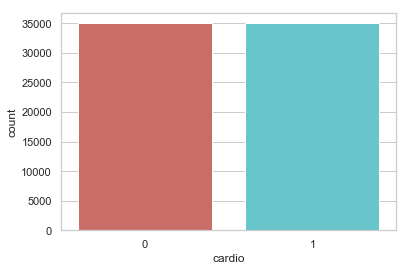

In [47]:
# create a graph that showcases the distribution of people who have and don't have the cardiovascular disease
df['cardio'].value_counts()
sns.countplot(x="cardio", data=df, palette="hls")
plt.show()

In [93]:
# make a function that creates a stacked bar of different features versus Cardiovascular disease
def viz_stack(df, factor, title, xlabel, ylabel, xlabels, rot): 
    table=pd.crosstab(df[factor],df.cardio)
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(range(len(xlabels)), xlabels, rotation=rot)

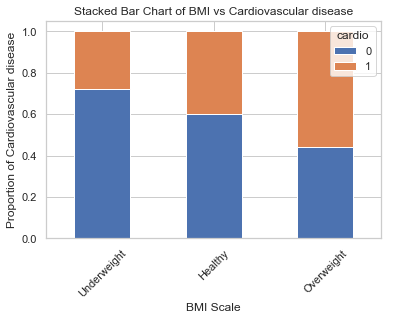

In [121]:
# creates a stacked bar of BMI scale versus proportion of Cardiovascular disease
bmi_xlabels=["Underweight", "Healthy", "Overweight"]
viz_stack(df, "bmi_scale", "Stacked Bar Chart of BMI vs Cardiovascular disease", "BMI Scale", "Proportion of Cardiovascular disease", bmi_xlabels, 45)


From the graph above we can see that overweight people have the highest percentage of cardiovascular disease and people with underweight have the lowest percentage of cardiovascular disease. 

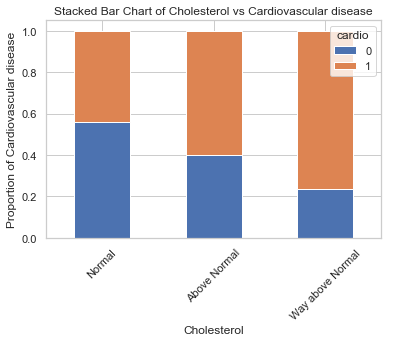

In [122]:
# creates a stacked bar of Cholesterol versus proportion of Cardiovascular disease
cholesterol_xlabels = ["Normal", "Above Normal", "Way above Normal"]
viz_stack(df, "cholesterol", "Stacked Bar Chart of Cholesterol vs Cardiovascular disease", "Cholesterol", "Proportion of Cardiovascular disease", cholesterol_xlabels, 45)


From the above graph we can see that the people with cholestrol level of way above normal have highest percentage of cardiovascular disease, and people with cholestrol level of normal have lowest percentage of cardio vascular disease. 

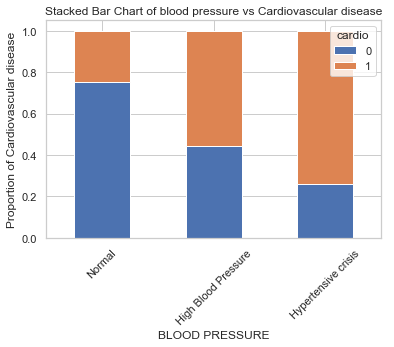

In [123]:
# creates a stacked bar of Cholesterol versus proportion of Cardiovascular disease
blood_xlabels = ["Normal", "High Blood Pressure", "Hypertensive crisis"]
viz_stack(df, "blood_pressure", "Stacked Bar Chart of blood pressure vs Cardiovascular disease", "BLOOD PRESSURE", "Proportion of Cardiovascular disease", blood_xlabels, 45)


In [ ]:
From the above graph we can see that p

In [51]:
# use describe function to display statistics such as min, max, mean and std for each features 
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,bmi,bmi_scale,blood_pressure,gender_new
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686,27.556513,2.627886,2.931200,0.349571
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294,6.091511,0.502215,0.919126,0.476838
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,3.471784,1.000000,1.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115,2.000000,3.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.374068,3.000000,3.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.222222,3.000000,3.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,298.666667,3.000000,5.000000,1.000000


From the table above, we can see that there are outliers in ap_hi, ap_lo, weight, and height. 

In [52]:
# display sample statisitcs for the column 'height'
df.describe().height

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

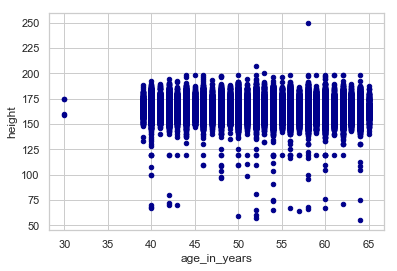

In [53]:
# create a scatter plot that tells us which dots could be considered as outliers 
df_after = df
ax1 = df.plot.scatter(x='age_in_years', y='height', c='DarkBlue')

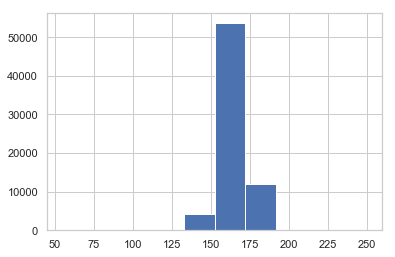

In [54]:
# create a histogram that displays the distribution of individual's height
df.height.hist()

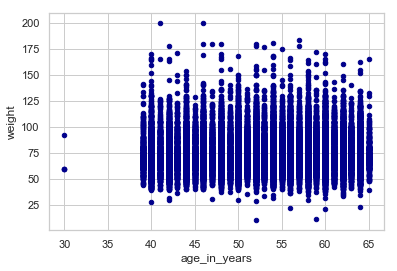

In [55]:
# create a scatter plot that tells us which dots could be considered as outliers 
ax1 = df.plot.scatter(x='age_in_years', y='weight', c='DarkBlue')

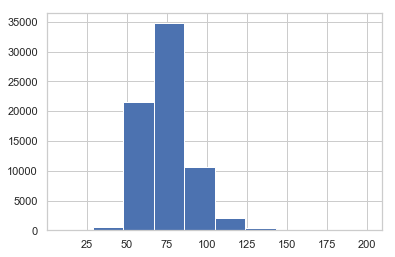

In [56]:
# create a histogram that displays the distribution of individual's weight
df.weight.hist()

In [57]:
# get rid of outliers by dropping whichever values that falls below 2.5% or above 97.5% 
df_after.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df_after.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

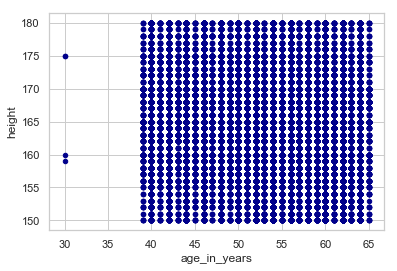

In [58]:
# create a scatter plot that shows the correlation between age and height after getting rid of outliers
height2 = df_after.plot.scatter(x='age_in_years', y='height', c='DarkBlue')

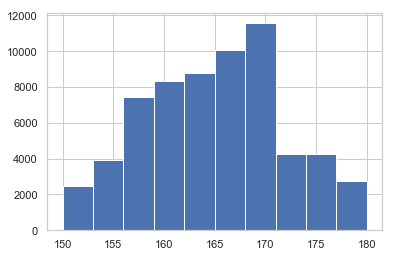

In [59]:
# create a histogram that shows the distribution of height after getting rid of outliers
df_after.height.hist()

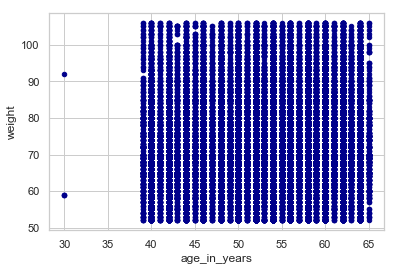

In [60]:
# create a scatter plot that shows the correlation between age and weight after getting rid of outliers
weight2 = df_after.plot.scatter(x='age_in_years', y='weight', c='DarkBlue')

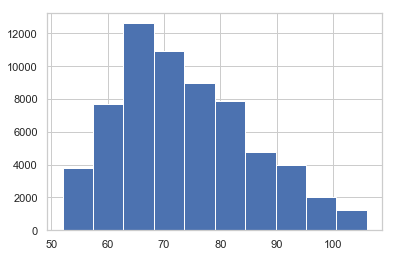

In [61]:
# create a histogram that shows the distribution of weight after getting rid of outliers
df_after.weight.hist()

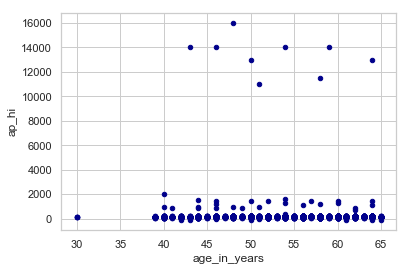

In [62]:
# create a scatter plot that tells us which dots could be considered as outliers for systolic blood pressure
blood_hi = df.plot.scatter(x='age_in_years', y='ap_hi', c='DarkBlue')

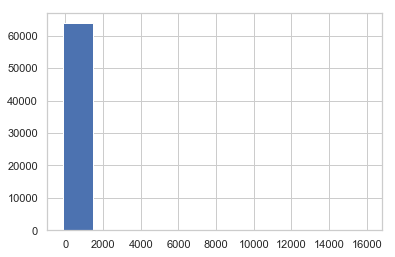

In [63]:
# create a histogram that displays the distribution of each individual's systolic blood pressure
df.ap_hi.hist()

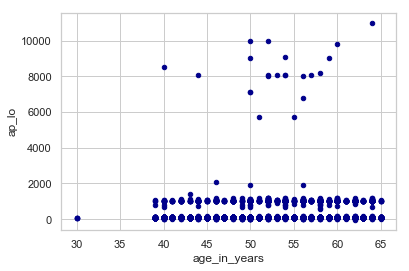

In [64]:
# create a scatter plot that tells us which dots could be considered as outliers for diastolic blood pressure
blood_hi = df.plot.scatter(x='age_in_years', y='ap_lo', c='DarkBlue')

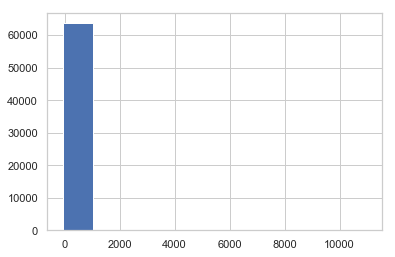

In [65]:
# create a histogram that displays the distribution of each individual's diastolic blood pressure
df.ap_lo.hist()

In [66]:
# get rid of outliers by dropping whichever values that falls below 2.5% or above 97.5% for systolic blood pressure and diastolic blood pressure
df_after.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df_after.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

In [67]:
# check if there's any diastilic pressure higher than systolic blood pressure 
# (Diastilic pressure is not supposed to be higher than systolic blood pressure)
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 0 cases


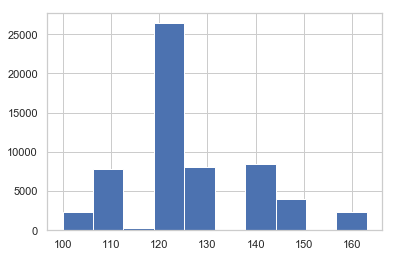

In [68]:
# create a histogram that shows the distribution of systolic blood pressure after getting rid of outliers
df_after.ap_hi.hist()

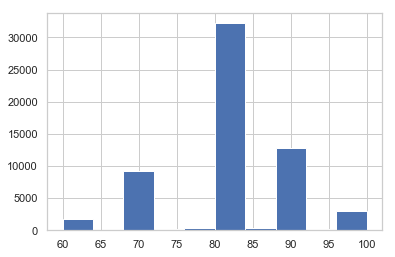

In [69]:
# create a histogram that shows the distribution of diastolic blood pressure after getting rid of outliers
df_after.ap_lo.hist()

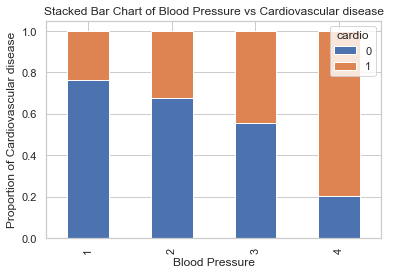

In [70]:
# creates a stacked bar of Blood pressure versus proportion of Cardiovascular disease
blood_xlabels = ["Normal", "Elevated", "High Blood Pressure: Stage 1", "High Blood Pressure: Stage 2", "Hypertensive crisis"]
viz_stack(df, "blood_pressure", "Stacked Bar Chart of Blood Pressure vs Cardiovascular disease", "Blood Pressure", "Proportion of Cardiovascular disease", blood_xlabels, 90)

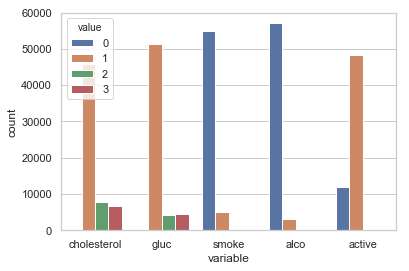

In [71]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

>This is the distribution of our data across different factors, particularly cholesterol levels, glucose levels, smoker status, alcohol drinker status, and bmi category.  
From here, we can see that most of the individuals in the dataset have normal cholesterol levels and normal glucose levels. Most of them also don't smoke, don't drink, and are inactive in lifestyle.   Looking at the BMI scale distribution, the largest category that individuals fall under are overweight, followed by healthy, obese, and underweight.

In [75]:
df_categorical = df.loc[:,['cholesterol']] 
df_categorical.cholesterol.rename_categories({1: 'normal', 2: 'above normal', 3: 'way above normal'})
df_categorical
# g = sns.countplot(x="cardio", hue="cholestero", data= pd.melt(df_categorical), palette="hls");
# plt.title("Risk Factor Distribution Comparison")
# handletext = ["Cholesterol"]
# new_labels = ["normal", "above normal", "way above normal "]

# fig, ax = plt.subplots()
# ax.legend(g, new_labels)

AttributeError: 'Series' object has no attribute 'rename_categories'

Text(0.5, 1.0, 'Risk Factor Distribution Comparison')

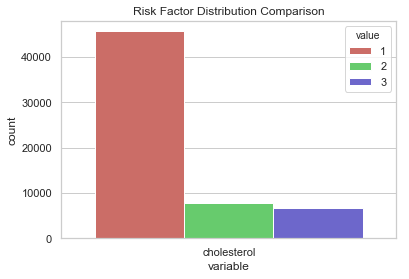

In [76]:
df_categorical = df.loc[:,['cholesterol']] 
g = sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical), palette="hls");
plt.title("Risk Factor Distribution Comparison")

In [24]:
labeldic

{'Cholestrol': 'A', 'Glucose': 'B', 'Smoke': 'C', 'Alcohol': 'D'}

In [ ]:
df_categorical = ['cholesterol','gluc', 'smoke', 'alco', 'active', 'bmi_scale'] 
grouped = df.groupby('cardio').count()
sns.countplot(x=df_categorical, hue="age",data=df, palette="hls");
# plt.title("Risk Factor Distribution Comparison")
# plt.show()


In [235]:
grouped

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_in_years,bmi,bmi_scale,Blood Pressure,blood_pressure
cardio,,,,,,,,,,,,,,,,
0,35021,35021,35021,35021,35021,35021,35021,35021,35021,35021,35021,35021,35021,35021,35021,35021
1,34979,34979,34979,34979,34979,34979,34979,34979,34979,34979,34979,34979,34979,34979,34979,34979


In [1]:
# fig, ax = plt.subplots()
# ax.scatter(z, y)

# for i, txt in enumerate(n):
#     ax.annotate(txt, (z[i], y[i]))

In [2]:
# df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active', 'bmi_scale']] 
# g = sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical), palette="hls");
# plt.title("Risk Factor Distribution Comparison")
# for index, row in df.iterrows():
# #     print(row)
# #     break
#     g.text(row.smoke,row.cardio, round(2.0, 2), color='black', ha="center")
# # plt.show()


In [262]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


##  Statistical Model

### Logistic Regression


Our dataset contains two different types of data: **Ordinal/categorical** and **binary**.  
- Ordinal/Categorical data includes BMI (1-3), cholesterol level (1-3), and glucose level (1-3).  
- Binary data includes gender, smoke, alcohol, and active status. 
Because of the data types are different, we decided to treat them separately when applying logistic regression model. 

In [13]:
# Logistic regression with categorical data 
formula_cate = "cardio ~ bmi_scale + cholesterol + gluc"
logistic_model_cate = smf.glm(formula=formula_cate, data=df, family=sm.families.Binomial()).fit()
logistic_model_cate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 cardio   No. Observations:                70000
Model:                            GLM   Df Residuals:                    69996
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -46107.
Date:                Mon, 11 Mar 2019   Deviance:                       92214.
Time:                        20:56:34   Pearson chi2:                 6.99e+04
No. Iterations:                     5   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.3047      0.045    -50.845      0.000      -2.394      -2.216
bmi_scale       0.5579      0.016     35.360      0.000       0.527       0.589
cholesterol     0.6812      0.014     48.980      0.000       0.654       0.708
gluc           -0.0676      0.016     -4.242      0.000      -0.099      -0.036
===============================================================================
"""

The estimated coefficients are in _log odds_. The odds of an event is the probability of that event devided by its complement: 
$$\frac{P}{1-P}$$

By exponentiating the coefficients, we can calculate the odds, which are easier to interpret. 

In [14]:
# turn log odds to odds
np.exp(logistic_model_cate.params)

Intercept      0.099788
bmi_scale      1.747060
cholesterol    1.976261
gluc           0.934665
dtype: float64

We can then do some interpretation with the data above.  
**Coefficient:** 
- With a unit increase in *BMI*, we can expect the odds of cardiovascular disease to increase by 1.7 times while holding everything else constant.   
- With a unit increase in *cholesterol level*, we can expect the odds of cardiovascular disease to increase by almost 2 times while holding everything else constant.  
- With a unit increase in *glucose level*, we can expect the odds of cardiovascular disease to increase by 0.9 times while holding everything else constant.  

**Standard Error:** 
- The standard errors are pretty low for all predictors meaning they we are not too far off from the true mean.   

**P-value:** 
- All p-values are lower than 0.05 so we can say that there are statistical significance between the predictors and cardiovascular disease.  

In [19]:
# Logistic regression with binary data 
formula_bi = "cardio ~ gender_new + smoke + alco + active"

In [21]:
logistic_model_bi = smf.glm(formula=formula_bi, data=df, family=sm.families.Binomial()).fit()
logistic_model_bi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 cardio   No. Observations:                70000
Model:                            GLM   Df Residuals:                    69995
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -48461.
Date:                Mon, 11 Mar 2019   Deviance:                       96922.
Time:                        21:13:27   Pearson chi2:                 7.00e+04
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1323      0.018      7.364      0.000       0.097       0.167
gender_new     0.0635      0.017      3.760      0.000       0.030       0.097
smoke         -0.1329      0.030     -4.458      0.000      -0.191      -0.074
alco          -0.0233      0.036     -0.653      0.514      -0.093       0.047
active        -0.1775      0.019     -9.301      0.000      -0.215      -0.140
==============================================================================
"""

We would apply the same logic as categorical data

In [22]:
np.exp(logistic_model_bi.params)

Intercept     1.141416
gender_new    1.065585
smoke         0.875586
alco          0.976927
active        0.837350
dtype: float64

**Coefficient:**
- With a unit increase in *gender*, we can expect the odds of cardiovascular disease to increase by 1.7 times while holding everything else constant.   
- With a unit increase in *smoke*, we can expect the odds of cardiovascular disease to increase by almost 2 times while holding everything else constant.  
- With a unit increase in *alcohol*, we can expect the odds of cardiovascular disease to increase by 0.9 times while holding everything else constant.  


## Machine learning

In [30]:
# For splitting data
from sklearn.model_selection import train_test_split 
# For scaler/normalization
from sklearn.preprocessing import MinMaxScaler 
# Preprocessor
from sklearn.preprocessing import PolynomialFeatures
# Feature selections
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold
# for making pipelines
from sklearn.pipeline import make_pipeline           
# for grid search
from sklearn.model_selection import GridSearchCV  

# split train feature data into test and training data
train_features, test_features, train_outcome, test_outcome = train_test_split(
   df.drop(["cardio"], axis=1),      
   df['cardio'],      
   test_size=0.30, 
   random_state=11 
)


In [33]:


import warnings
warnings.filterwarnings("ignore")

def run_model(model, param_grid, xtrain, ytrain, xtest, ytest, do_poly = False):
    # Create a scaler
    scaler = MinMaxScaler()

    # Create polynomial transformation, percentile selector, and variance threshold 
    selecter = SelectPercentile()
    threshold = VarianceThreshold(.1)
    if do_poly: 
        poly = PolynomialFeatures()
        pipe = make_pipeline(poly, threshold, selecter, scaler, model)
    else: 
        pipe = make_pipeline(threshold, selecter, scaler, model)

    grid = GridSearchCV(pipe, param_grid)
    grid.fit(xtrain, ytrain)
    grid.best_params_
    accuracy = grid.score(xtest, ytest)
    return grid, accuracy
    


In [34]:
# Model 1: k-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
param_grid_knc = {'kneighborsclassifier__n_neighbors': np.arange(1,10),
                 'kneighborsclassifier__weights':["uniform", "distance"]}


grid_knc_a, score = run_model(knc, param_grid_knc, train_features, train_outcome, test_features, test_outcome, do_poly = False)
score

0.6469047619047619

In [35]:
# Model 2: Decision Tree Regressor 
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
param_grid_dtc = {'decisiontreeclassifier__max_depth': np.arange(1,10)}

grid_dtc, score = run_model(dtc, param_grid_dtc, train_features, train_outcome, test_features, test_outcome, do_poly = False)
score

0.6469047619047619

In [36]:
# Model 3: Logistic Regression 
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=False)
param_grid_linear = {'polynomialfeatures__degree':range(1, 3), 
              'selectpercentile__percentile':range(10, 30, 5)}
grid_dtc, score = run_model(lr, param_grid_linear, train_features, train_outcome, test_features, test_outcome, do_poly = True)
score

0.19543478925231428

In [37]:
# Model 4: BayesianRidge 
from sklearn.linear_model import BayesianRidge
bay = BayesianRidge()
param_grid_linear = {'polynomialfeatures__degree':range(1, 3), 
              'selectpercentile__percentile':range(10, 30, 5)}
grid_dtc, score = run_model(bay, param_grid_linear, train_features, train_outcome, test_features, test_outcome, do_poly = True)
score

0.19635300517621135